In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import DistanceMetric, NearestNeighbors
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ModifiedLabelEncoder import ModifiedLabelEncoder
from ModifiedStandardScaler import ModifiedStandardScaler
from xgboost import XGBClassifier
from IPython.display import display
from Recommendation import Recommend
pd.set_option('display.max_columns', None)


## Exploratory Data Analysis (EDA)

In [2]:
data = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(data.info())
display(data.describe())
display(data.describe(include = 'object'))
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
## used to create dash board options

# for column in data.select_dtypes('object').columns:
#     print(column)
#     print(':::::')
#     print(data[column].unique())
#     print('-----')

Text(0.5, 1.0, 'Attrition Distribution')

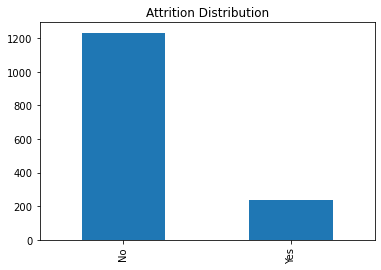

In [4]:
data.Attrition.value_counts().plot(kind = 'bar')
plt.title('Attrition Distribution')

## lets check correlation between features.
### If there is a correlation between two features, we select just one of correlated features, one that have most correlation with target value (Attrition)

In [5]:
data_attr_le = data.copy()
data_attr_le['Attrition_le'] = LabelEncoder().fit_transform(data.Attrition)
data_attr_le.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_le
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


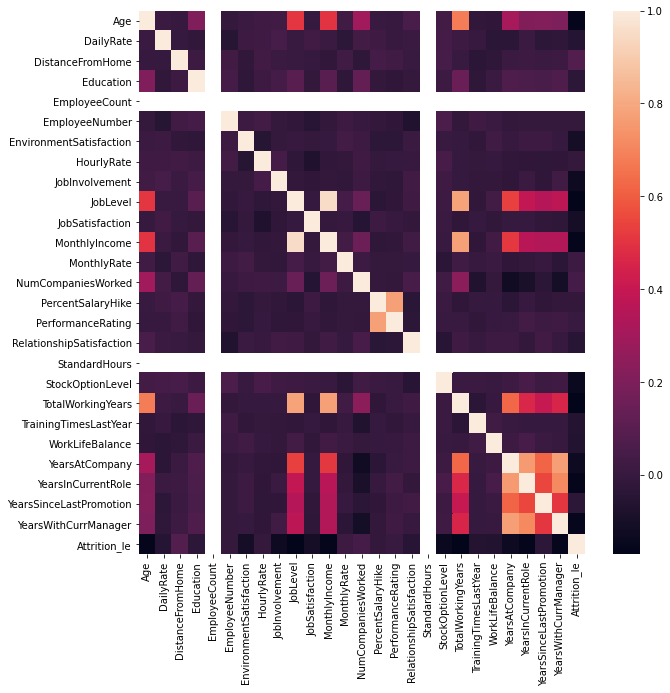

In [6]:
corr = data_attr_le.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)

### (MonthlyIncome and JobLevel), (TotalWorkingYears and JobLevel)  are highly correlated.

# chi2 test for categorical features
H0: There exists no association between the two variables

H1: There is association between the variables

p-value< 0.05, the H0 is rejected

In [7]:
categorical_columns = data.drop('Attrition', 1).select_dtypes('object').columns
le_pipe_ = Pipeline(steps=[
    ('label_encoding',ModifiedLabelEncoder())])
data_led_ = le_pipe_.fit_transform(data)
chi2_result = chi2(data_led_, data_led_.Attrition)[1]
for k, v in zip(data_led_.columns, chi2_result):
    print(f'p value for {k}: {v}')

p value for Age: 4.574015069520456e-20
p value for Attrition: 4.107323550151841e-270
p value for BusinessTravel: 0.998815822140196
p value for DailyRate: 4.92392440516756e-210
p value for Department: 0.24893026383033096
p value for DistanceFromHome: 1.3967484774207307e-15
p value for Education: 0.4705678560763332
p value for EducationField: 0.3608561137190792
p value for EmployeeCount: 0.9999999999999986
p value for EmployeeNumber: 2.465655097423937e-14
p value for EnvironmentSatisfaction: 0.008665045353586646
p value for Gender: 0.4751013942114962
p value for HourlyRate: 0.5111172647959505
p value for JobInvolvement: 0.031867401359885944
p value for JobLevel: 5.916574874566373e-07
p value for JobRole: 0.0026932325324325788
p value for JobSatisfaction: 0.008096759708238616
p value for MaritalStatus: 1.4936309221435435e-05
p value for MonthlyIncome: 0.0
p value for MonthlyRate: 3.2879327626280303e-262
p value for NumCompaniesWorked: 0.01116631955957427
p value for Over18: nan
p value fo

based on above results, I drop these columns:

'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber' are constant and have no variance.

'Education', 'PerformanceRating', 'Gender', 'RelationshipSatisfaction' are droped based on chi2 test results

I think 'DistanceFromHome' is not very related

 'JobLevel', 'TotalWorkingYears' are correlated to 'MonthlyIncome'

In [8]:

bad_columns = ['EmployeeCount', 'Over18', 'StandardHours', 'Education', 'PerformanceRating', 'Gender', 'DistanceFromHome', 'RelationshipSatisfaction',
              'JobLevel', 'TotalWorkingYears', 'EmployeeNumber' ]

In [9]:
pure_data = data.drop(bad_columns, 1)

In [10]:
pure_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,Life Sciences,2,94,3,Sales Executive,4,Single,5993,19479,8,Yes,11,0,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,Life Sciences,3,61,2,Research Scientist,2,Married,5130,24907,1,No,23,1,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,Other,4,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,15,0,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,Life Sciences,4,56,3,Research Scientist,3,Married,2909,23159,1,Yes,11,0,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,Medical,1,40,3,Laboratory Technician,2,Married,3468,16632,9,No,12,1,3,3,2,2,2,2


### lets check distribution of features

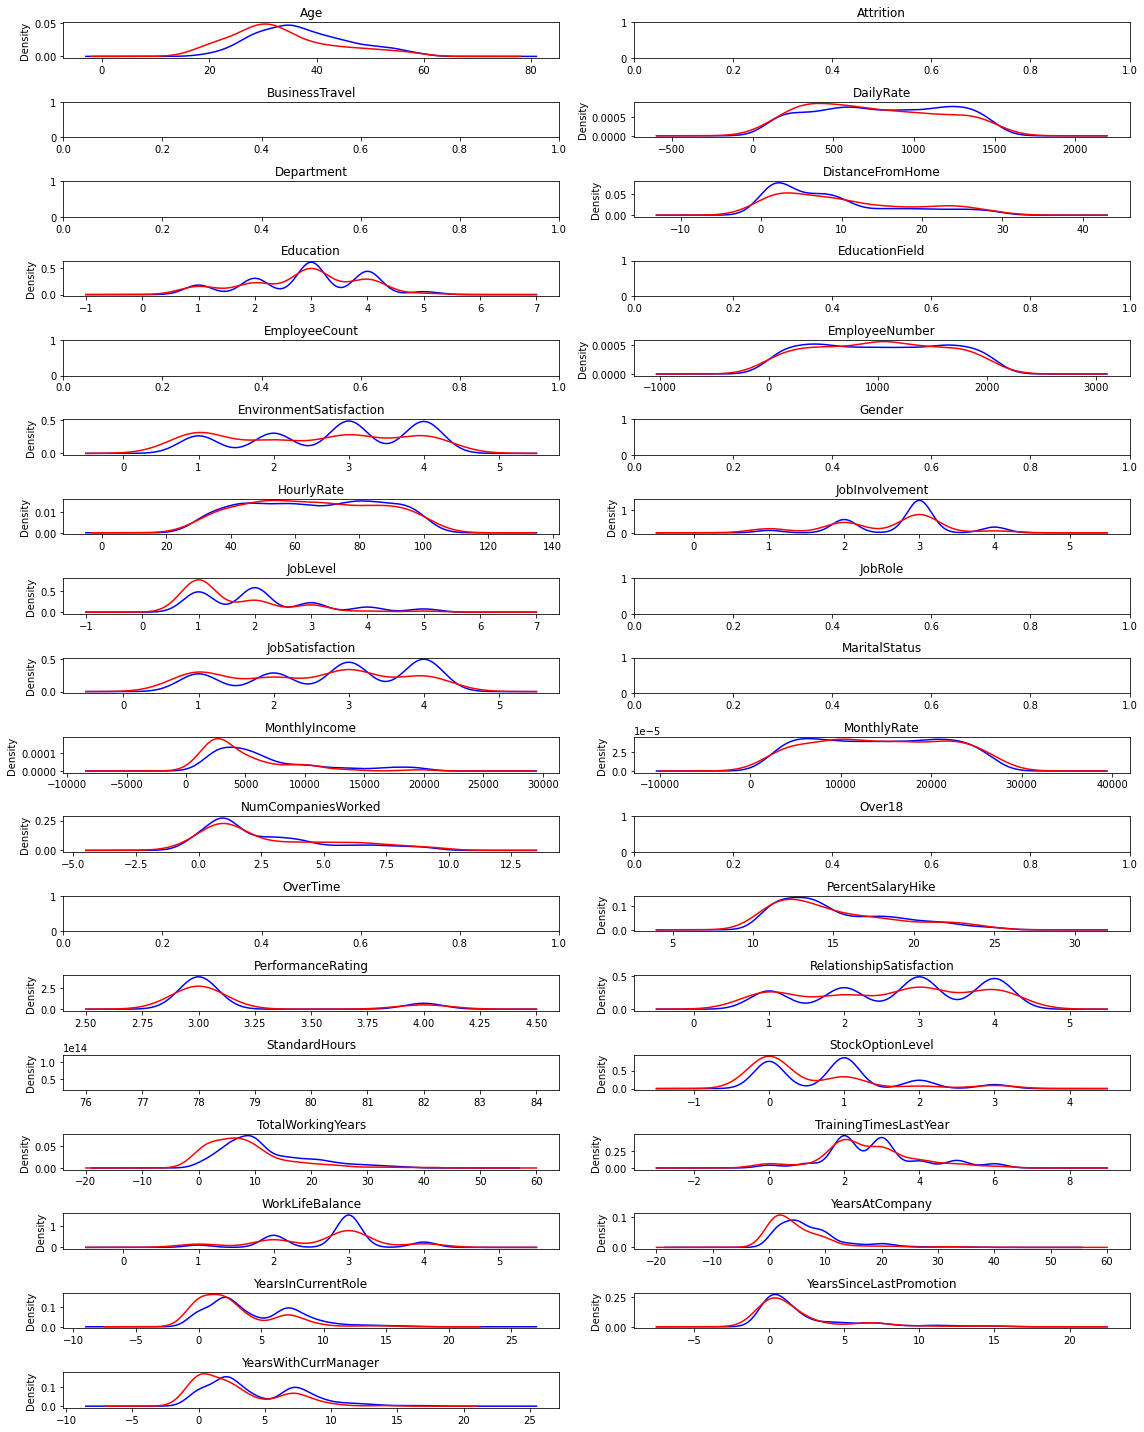

In [11]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,20))
for i, column in enumerate(data_led_.columns):
    try:
        plt.subplot(18,2,i+1)
        plt.title(column)
        data[data_led_.Attrition==0][column].plot(kind='kde', color='b')
        data[data_led_.Attrition==1][column].plot(kind='kde', color='r')
        
    except:
        pass
    
plt.tight_layout()

### in above plot, the blue line is ones which are with attrition=No and red line is for attrition= Yes.
the distributions for two classes are very similar to each other

## Feature engineering

### For feature engineering, we will add:
* difference of salary and MonthlyRate with mean of then respectly
* satisfications sum


In [12]:
pure_data_led = data_led_.drop(bad_columns, 1)
pure_data_led.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,94,3,7,4,2,5993,19479,8,1,11,0,0,1,6,4,0,5
1,49,0,1,279,1,1,3,61,2,6,2,1,5130,24907,1,0,23,1,3,3,10,7,1,7
2,37,1,2,1373,1,4,4,92,2,2,3,2,2090,2396,6,1,15,0,3,3,0,0,0,0
3,33,0,1,1392,1,1,4,56,3,6,3,1,2909,23159,1,1,11,0,3,3,8,7,3,0
4,27,0,2,591,1,3,1,40,3,2,2,1,3468,16632,9,0,12,1,3,3,2,2,2,2


In [13]:
pure_data_led['sats_sum'] = pure_data_led.EnvironmentSatisfaction + pure_data_led.JobSatisfaction
mean_sal = pure_data_led.MonthlyIncome.mean()
print(mean_sal)
pure_data_led['income_comparison'] = pure_data_led.MonthlyIncome - mean_sal
pure_data_led['MonthlyRate_comparison'] = pure_data_led.MonthlyRate - pure_data_led.MonthlyRate.mean()
pure_data_led.head()

6502.931292517007


,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,sats_sum,income_comparison,MonthlyRate_comparison
0,41,1,2,1102,2,1,2,94,3,7,4,2,5993,19479,8,1,11,0,0,1,6,4,0,5,6,-509.931293,5165.896599
1,49,0,1,279,1,1,3,61,2,6,2,1,5130,24907,1,0,23,1,3,3,10,7,1,7,5,-1372.931293,10593.896599
2,37,1,2,1373,1,4,4,92,2,2,3,2,2090,2396,6,1,15,0,3,3,0,0,0,0,7,-4412.931293,-11917.103401
3,33,0,1,1392,1,1,4,56,3,6,3,1,2909,23159,1,1,11,0,3,3,8,7,3,0,7,-3593.931293,8845.896599
4,27,0,2,591,1,3,1,40,3,2,2,1,3468,16632,9,0,12,1,3,3,2,2,2,2,3,-3034.931293,2318.896599


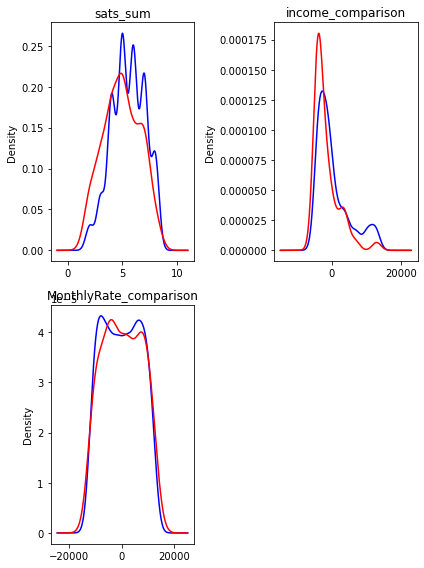

In [14]:
plt.figure(figsize=(6,8))
plt.subplot(2,2,1)
pure_data_led.loc[pure_data_led.Attrition==0].sats_sum.plot(kind='kde', color= 'b')
pure_data_led.loc[pure_data_led.Attrition==1].sats_sum.plot(kind='kde', color= 'r')
plt.title('sats_sum')
plt.subplot(2,2,2)
pure_data_led.loc[pure_data_led.Attrition==0].income_comparison.plot(kind='kde', color= 'b')
pure_data_led.loc[pure_data_led.Attrition==1].income_comparison.plot(kind='kde', color= 'r')
plt.title('income_comparison')
plt.subplot(2,2,3)
pure_data_led.loc[pure_data_led.Attrition==0].MonthlyRate_comparison.plot(kind='kde', color= 'b')
pure_data_led.loc[pure_data_led.Attrition==1].MonthlyRate_comparison.plot(kind='kde', color= 'r')
plt.title('MonthlyRate_comparison')
plt.tight_layout()

In [15]:
pure_data['sats_sum'] = pure_data.EnvironmentSatisfaction + pure_data.JobSatisfaction
mean_sal = pure_data.MonthlyIncome.mean()
print(mean_sal)
pure_data['income_comparison'] = pure_data.MonthlyIncome - mean_sal
pure_data['MonthlyRate_comparison'] = pure_data.MonthlyRate - pure_data.MonthlyRate.mean()

6502.931292517007


## Standardize Features

In [16]:
scaler_pipe = Pipeline(steps=[
    ('standard_scaling',ModifiedStandardScaler())])
data_standard = scaler_pipe.fit_transform(pure_data)
data_standard.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,sats_sum,income_comparison,MonthlyRate_comparison
0,0.446350,Yes,Travel_Rarely,0.742527,Sales,Life Sciences,-0.660531,1.383138,0.379672,Sales Executive,1.153254,Single,-0.108350,0.726020,2.125136,Yes,-1.150554,-0.932014,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0.355314,-0.108350,0.726020
1,1.322365,No,Travel_Frequently,-1.297775,Research & Development,Life Sciences,0.254625,-0.240677,-1.026167,Research Scientist,-0.660853,Married,-0.291719,1.488876,-0.678049,No,2.129306,0.241988,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,-0.291111,-0.291719,1.488876
2,0.008343,Yes,Travel_Rarely,1.414363,Research & Development,Other,1.169781,1.284725,-1.026167,Laboratory Technician,0.246200,Single,-0.937654,-1.674841,1.324226,Yes,-0.057267,-0.932014,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,1.001740,-0.937654,-1.674841
3,-0.429664,No,Travel_Frequently,1.461466,Research & Development,Life Sciences,1.169781,-0.486709,0.379672,Research Scientist,0.246200,Married,-0.763634,1.243211,-0.678049,Yes,-1.150554,-0.932014,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,1.001740,-0.763634,1.243211
4,-1.086676,No,Travel_Rarely,-0.524295,Research & Development,Medical,-1.575686,-1.274014,0.379672,Laboratory Technician,-0.660853,Married,-0.644858,0.325900,2.525591,No,-0.877232,0.241988,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-1.583962,-0.644858,0.325900


In [17]:
le_pipe = Pipeline(steps=[
    ('label_encoding',ModifiedLabelEncoder())])
pure_data_led= le_pipe.fit_transform(pure_data)
pure_data_led.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,sats_sum,income_comparison,MonthlyRate_comparison
0,41,1,2,1102,2,1,2,94,3,7,4,2,5993,19479,8,1,11,0,0,1,6,4,0,5,6,-509.931293,5165.896599
1,49,0,1,279,1,1,3,61,2,6,2,1,5130,24907,1,0,23,1,3,3,10,7,1,7,5,-1372.931293,10593.896599
2,37,1,2,1373,1,4,4,92,2,2,3,2,2090,2396,6,1,15,0,3,3,0,0,0,0,7,-4412.931293,-11917.103401
3,33,0,1,1392,1,1,4,56,3,6,3,1,2909,23159,1,1,11,0,3,3,8,7,3,0,7,-3593.931293,8845.896599
4,27,0,2,591,1,3,1,40,3,2,2,1,3468,16632,9,0,12,1,3,3,2,2,2,2,3,-3034.931293,2318.896599


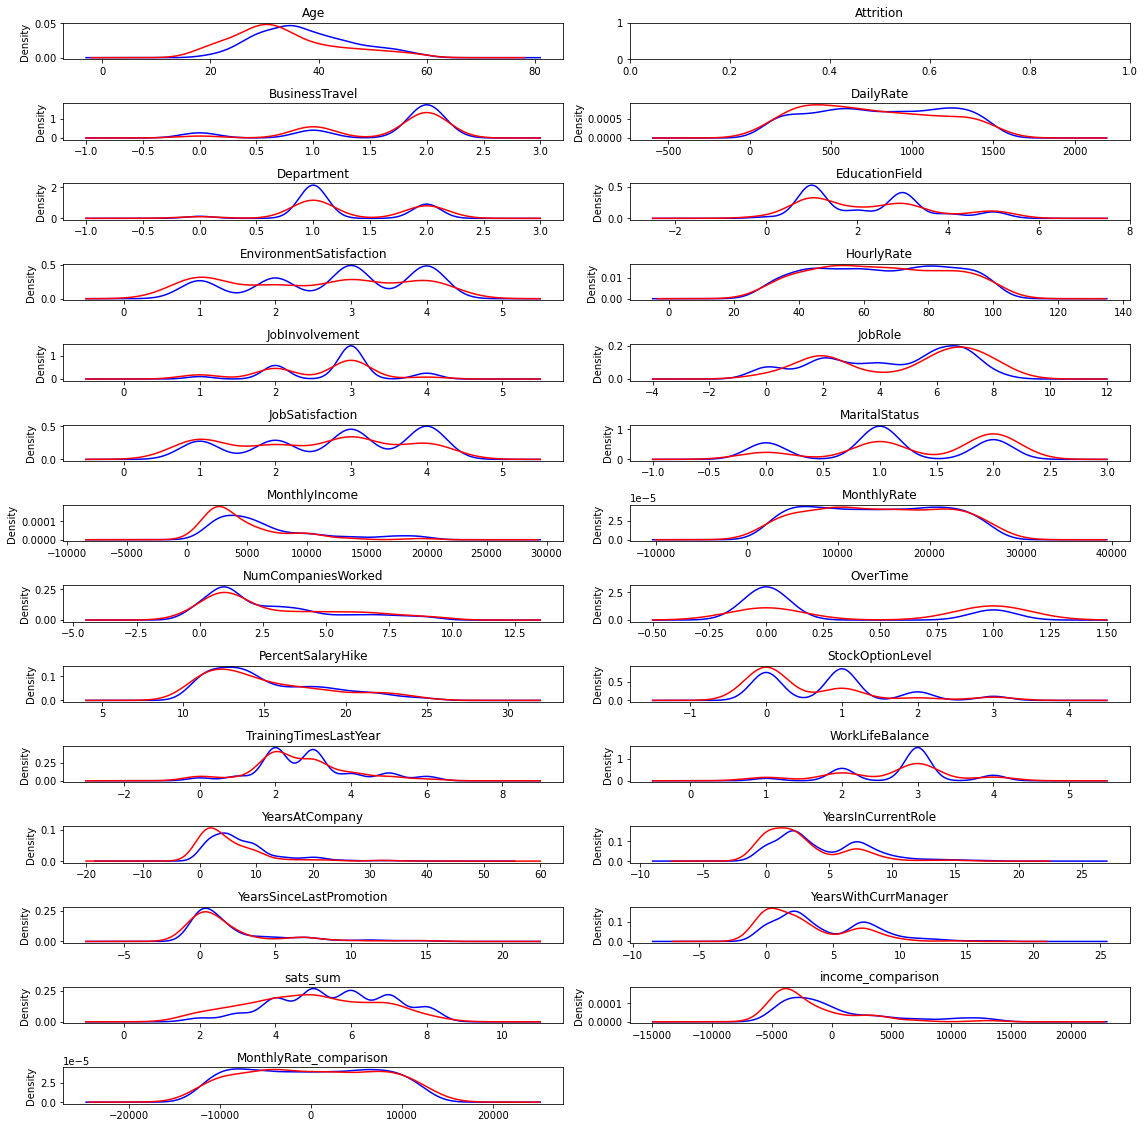

In [18]:
plt.figure(figsize=(16,20))
for i, column in enumerate(pure_data_led.columns):
    try:
        plt.subplot(18,2,i+1)
        plt.title(column)
        pure_data_led[pure_data_led.Attrition==0][column].plot(kind='kde', color='b')
        pure_data_led[pure_data_led.Attrition==1][column].plot(kind='kde', color='r')
        
    except:
        pass
    
plt.tight_layout()

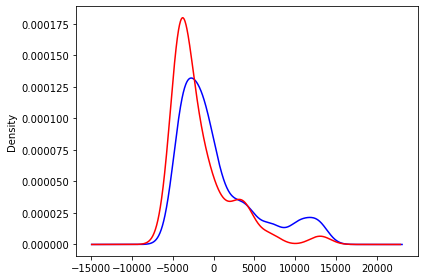

In [19]:
pure_data_led['new_feature'] = pure_data_led.Age + pure_data_led.income_comparison + pure_data_led.YearsAtCompany
pure_data_led[pure_data_led.Attrition==0]['new_feature'].plot(kind='kde', color='b')
pure_data_led[pure_data_led.Attrition==1]['new_feature'].plot(kind='kde', color='r')
plt.tight_layout()

### this new feature decreased the accuracy. so I drop it from data

In [20]:
pure_data_led.drop(['new_feature', 'sats_sum', 'income_comparison', 'MonthlyRate_comparison'],1 , inplace=True)

In [21]:
pure_data_led.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,94,3,7,4,2,5993,19479,8,1,11,0,0,1,6,4,0,5
1,49,0,1,279,1,1,3,61,2,6,2,1,5130,24907,1,0,23,1,3,3,10,7,1,7
2,37,1,2,1373,1,4,4,92,2,2,3,2,2090,2396,6,1,15,0,3,3,0,0,0,0
3,33,0,1,1392,1,1,4,56,3,6,3,1,2909,23159,1,1,11,0,3,3,8,7,3,0
4,27,0,2,591,1,3,1,40,3,2,2,1,3468,16632,9,0,12,1,3,3,2,2,2,2


## lets check some algorithms:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(pure_data_led.drop('Attrition', 1), pure_data_led.Attrition, test_size = 0.33, random_state = 42)

### SVM with linear kernel

In [140]:
svc_cls = SVC(kernel='linear', gamma = 'auto', random_state=42,)
svc_cls.fit(X_train, y_train)
svc_cls.score(X_test, y_test)

### multi-nomial naive bayes

In [ ]:
# mnb_cls = MultinomialNB()
# mnb_cls = mnb_cls.fit(X_train, y_train)
# mnb_cls.score(X_test, y_test)

### Random Forest Classifier

In [23]:
rndf_cls = RandomForestClassifier(max_depth= 17)
rndf_cls.fit(X_train, y_train)
rndf_cls.score(X_test, y_test)

0.8662551440329218

### Multi-Layer Perceptron

In [24]:
mlp_cls = MLPClassifier(activation='tanh',hidden_layer_sizes = (50,))
mlp_cls.fit(X_train, y_train)
mlp_cls.score(X_test, y_test)

0.8600823045267489

### AdaBoost Classifier

In [25]:
ab_cls = AdaBoostClassifier(n_estimators=100, learning_rate=0.9, random_state=42)
ab_cls.fit(X_train, y_train)
ab_cls.score(X_test, y_test)

0.8703703703703703

### XGBoost Classifier

In [26]:
xgb_cls = XGBClassifier(random_state = 42)
xgb_cls.fit(X_train, y_train)
xgb_cls.score(X_test, y_test)

0.8765432098765432

In [27]:
xgb_cls.feature_importances_

array([0.04008525, 0.05158472, 0.03141256, 0.03886408, 0.02597874,
       0.04912528, 0.02958228, 0.05300589, 0.02932119, 0.03537169,
       0.05889957, 0.05239387, 0.02425249, 0.04210185, 0.10410327,
       0.02777069, 0.06665895, 0.02803995, 0.03551595, 0.0377903 ,
       0.05238983, 0.04778677, 0.03796475], dtype=float32)

In [28]:
X_test.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [29]:
for c , f in zip(X_train.columns, xgb_cls.feature_importances_):
    print(c, f)

Age 0.040085252
BusinessTravel 0.05158472
DailyRate 0.031412557
Department 0.038864084
EducationField 0.02597874
EnvironmentSatisfaction 0.04912528
HourlyRate 0.029582279
JobInvolvement 0.05300589
JobRole 0.029321188
JobSatisfaction 0.03537169
MaritalStatus 0.05889957
MonthlyIncome 0.052393872
MonthlyRate 0.024252487
NumCompaniesWorked 0.04210185
OverTime 0.104103275
PercentSalaryHike 0.02777069
StockOptionLevel 0.06665895
TrainingTimesLastYear 0.028039949
WorkLifeBalance 0.035515953
YearsAtCompany 0.037790302
YearsInCurrentRole 0.052389834
YearsSinceLastPromotion 0.047786772
YearsWithCurrManager 0.03796475


### based on these result, I select XGBoost classifier
#### lets create pipeline for model

In [30]:
model_pipe = Pipeline(steps=[
    ('model_xgb', XGBClassifier(random_state=42))
])


In [31]:
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('model_xgb',
                 XGBClassifier(base_score=0.5, booster=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints=None,
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method=None,
                               validate_parameters=False, verbosity=None))])

In [32]:
model_pipe.score(X_test, y_test)

0.8765432098765432

In [33]:
y_pred = model_pipe.predict(X_test)

In [34]:
confusion_matrix(y_test, y_pred)

array([[404,  12],
       [ 48,  22]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       416
           1       0.65      0.31      0.42        70

    accuracy                           0.88       486
   macro avg       0.77      0.64      0.68       486
weighted avg       0.86      0.88      0.86       486



## Base Line algorithm
let create a simple model which predicts all attrition to 'No'

In [36]:
y_pred = np.zeros(y_test.shape)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       416
           1       0.00      0.00      0.00        70

    accuracy                           0.86       486
   macro avg       0.43      0.50      0.46       486
weighted avg       0.73      0.86      0.79       486



so over selected model is better than baseline

### save pipelines for later use

In [37]:

import joblib
joblib.dump(model_pipe,'model_xgb_pipe.joblib')
joblib.dump(le_pipe,'le_pipe.joblib')
joblib.dump(scaler_pipe, 'scaler_pipe.joblib')

['scaler_pipe.joblib']

In [41]:
pure_data.sample(30).to_csv('data/sample.csv')

## Recommendation part
target is to give advice to HR to cancel the attrition of a personel. some parameters are unavailable to change:
* age
* education
* marital status
* department
* NumCompaniesWorked
* TrainingTimesLastYear
* YearsAtCompany
* YearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager

so we can search persons based on these parameters and select the nearset parameters for the person.
we can group based on above parameters and apply knn to the group.

so our independent paramters are ones mentioned above and target parameters are:
* BusinessTravel
* DailyRate
* EnvironmentSatisfaction
* HourlyRate	
* JobInvolvement	
* JobRole	
* JobSatisfaction 
* MonthlyIncome	
* MonthlyRate	 
* OverTime	
* PercentSalaryHike	
* StockOptionLevel
* WorkLifeBalance

so we should check by increasing which of the paramters, the attrition risk reduces.

for this part, we can use KNN for finding the nearest non-attrition person and get its parameters.

In [22]:
pure_data_led.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,94,3,7,4,2,5993,19479,8,1,11,0,0,1,6,4,0,5
1,49,0,1,279,1,1,3,61,2,6,2,1,5130,24907,1,0,23,1,3,3,10,7,1,7
2,37,1,2,1373,1,4,4,92,2,2,3,2,2090,2396,6,1,15,0,3,3,0,0,0,0
3,33,0,1,1392,1,1,4,56,3,6,3,1,2909,23159,1,1,11,0,3,3,8,7,3,0
4,27,0,2,591,1,3,1,40,3,2,2,1,3468,16632,9,0,12,1,3,3,2,2,2,2


In [23]:
# class Recommend:
#     search_on = ['Age', 'EducationField', 'MaritalStatus', 'Department',
#                 'NumCompaniesWorked', 'TrainingTimesLastYear',
#                 'YearsAtCompany', 'YearsInCurrentRole',
#                 'YearsSinceLastPromotion','YearsWithCurrManager']
#     def __init__(self, data, target):
#         self.data = data
#         self.knn = NearestNeighbors().fit(data.loc[data[target]==0][self.search_on])
#     def recommend(self, sample):
#         distance, indx = self.knn.kneighbors(sample[self.search_on])
#         return indx[0]

In [24]:
recommend = Recommend(pure_data_led, 'Attrition')

In [25]:
indx = recommend.recommend(pure_data_led.iloc[:1])
indx

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
839,42,0,2,647,2,2,2,45,3,7,1,2,5155,2253,7,0,13,0,3,4,6,4,1,5
1356,41,0,2,337,2,2,3,54,3,7,2,1,4393,26841,5,0,21,1,3,3,5,4,1,4
1429,39,0,2,116,1,1,1,52,3,6,4,2,4108,5340,7,0,13,0,2,3,7,7,1,7
989,37,0,2,1439,1,1,3,54,3,6,3,1,2996,5182,7,1,15,0,2,3,6,4,1,3
1366,39,0,0,1251,2,1,1,32,1,7,3,1,5736,3987,6,0,19,1,1,3,3,2,1,2


In [26]:
le_pipe.inverse_transform(indx)

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
839,42,No,Travel_Rarely,647,Sales,Marketing,2,45,3,Sales Executive,1,Single,5155,2253,7,No,13,0,3,4,6,4,1,5
1356,41,No,Travel_Rarely,337,Sales,Marketing,3,54,3,Sales Executive,2,Married,4393,26841,5,No,21,1,3,3,5,4,1,4
1429,39,No,Travel_Rarely,116,Research & Development,Life Sciences,1,52,3,Research Scientist,4,Single,4108,5340,7,No,13,0,2,3,7,7,1,7
989,37,No,Travel_Rarely,1439,Research & Development,Life Sciences,3,54,3,Research Scientist,3,Married,2996,5182,7,Yes,15,0,2,3,6,4,1,3
1366,39,No,Non-Travel,1251,Sales,Life Sciences,1,32,1,Sales Executive,3,Married,5736,3987,6,No,19,1,1,3,3,2,1,2


In [27]:
indx.index

Int64Index([839, 1356, 1429, 989, 1366], dtype='int64')

In [28]:
pure_data.iloc[indx.index]

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,sats_sum,income_comparison,MonthlyRate_comparison
839,42,No,Travel_Rarely,647,Sales,Marketing,2,45,3,Sales Executive,1,Single,5155,2253,7,No,13,0,3,4,6,4,1,5,3,-1347.931293,-12060.103401
1356,41,No,Travel_Rarely,337,Sales,Marketing,3,54,3,Sales Executive,2,Married,4393,26841,5,No,21,1,3,3,5,4,1,4,5,-2109.931293,12527.896599
1429,39,No,Travel_Rarely,116,Research & Development,Life Sciences,1,52,3,Research Scientist,4,Single,4108,5340,7,No,13,0,2,3,7,7,1,7,5,-2394.931293,-8973.103401
989,37,No,Travel_Rarely,1439,Research & Development,Life Sciences,3,54,3,Research Scientist,3,Married,2996,5182,7,Yes,15,0,2,3,6,4,1,3,6,-3506.931293,-9131.103401
1366,39,No,Non-Travel,1251,Sales,Life Sciences,1,32,1,Sales Executive,3,Married,5736,3987,6,No,19,1,1,3,3,2,1,2,4,-766.931293,-10326.103401


## give analyzed recommendation

In [29]:
analyze_on = ['BusinessTravel', 'DailyRate',
              'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
              'MonthlyIncome', 'MonthlyRate', 'OverTime', 'PercentSalaryHike',
              'StockOptionLevel',
              'WorkLifeBalance']

In [30]:
rec_an = pure_data.iloc[indx.index][analyze_on]
rec_an

,BusinessTravel,DailyRate,EnvironmentSatisfaction,HourlyRate,JobInvolvement,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,StockOptionLevel,WorkLifeBalance
839,Travel_Rarely,647,2,45,3,5155,2253,No,13,0,4
1356,Travel_Rarely,337,3,54,3,4393,26841,No,21,1,3
1429,Travel_Rarely,116,1,52,3,4108,5340,No,13,0,3
989,Travel_Rarely,1439,3,54,3,2996,5182,Yes,15,0,3
1366,Non-Travel,1251,1,32,1,5736,3987,No,19,1,3


In [32]:
pure_data.iloc[:1][analyze_on]

,BusinessTravel,DailyRate,EnvironmentSatisfaction,HourlyRate,JobInvolvement,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,StockOptionLevel,WorkLifeBalance
0,Travel_Rarely,1102,2,94,3,5993,19479,Yes,11,0,1


In [ ]:
# for categorical, select most frequent, for numeric, select mean

In [41]:
print(pure_data.iloc[:1][analyze_on].select_dtypes('object').columns)
print(pure_data.iloc[:1][analyze_on].select_dtypes('number').columns)

Index(['BusinessTravel', 'OverTime'], dtype='object')
Index(['DailyRate', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'StockOptionLevel',
       'WorkLifeBalance'],
      dtype='object')


In [43]:
rec_an.mean()

DailyRate                   758.0
EnvironmentSatisfaction       2.0
HourlyRate                   47.4
JobInvolvement                2.6
MonthlyIncome              4477.6
MonthlyRate                8720.6
PercentSalaryHike            16.2
StockOptionLevel              0.4
WorkLifeBalance               3.2
dtype: float64

In [75]:
dif = rec_an.select_dtypes('object').mode() != pure_data.iloc[:1][analyze_on].select_dtypes('object')
dif

,BusinessTravel,OverTime
0,False,True


In [78]:
dif[dif==True].dropna(1).columns

Index(['OverTime'], dtype='object')

In [83]:
categorical_diff = rec_an.select_dtypes('object').mode()[dif[dif==True].dropna(1).columns]
categorical_diff

,OverTime
0,No


In [84]:
temp = rec_an.select_dtypes('number').mean().astype('int') - pure_data.iloc[:1][analyze_on].select_dtypes('number')
numeric_diff = temp[temp>0].dropna(1)
numeric_diff

,PercentSalaryHike,WorkLifeBalance
0,5,2


In [69]:
temp[temp>0].dropna(1).columns

Index(['PercentSalaryHike', 'WorkLifeBalance'], dtype='object')

In [101]:
numeric_diff = rec_an.select_dtypes('number').mean().astype('int') > pure_data.iloc[:1][analyze_on].select_dtypes('number')
numeric_diff= rec_an.select_dtypes('number').mean()[numeric_diff[numeric_diff].dropna(1).columns].astype('int').to_frame().T
numeric_diff

,PercentSalaryHike,WorkLifeBalance
0,16,3


In [103]:
all_diff = pd.concat((numeric_diff, categorical_diff), 1)
all_diff

,PercentSalaryHike,WorkLifeBalance,OverTime
0,16,3,No


In [108]:
all_diff.to_dict()

{'PercentSalaryHike': {0: 16},
 'WorkLifeBalance': {0: 3},
 'OverTime': {0: 'No'}}

In [31]:
from recommend_analyzer import Analyze

In [32]:
Analyze(pure_data.iloc[:1][analyze_on], pure_data.iloc[indx.index][analyze_on]).analyze()

,PercentSalaryHike,WorkLifeBalance,OverTime
0,16,3,No


In [26]:
pure_data_led.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,sats_sum,income_comparison,MonthlyRate_comparison
0,41,1,2,1102,2,1,2,94,3,7,4,2,5993,19479,8,1,11,0,0,1,6,4,0,5,6,-509.931293,5165.896599
1,49,0,1,279,1,1,3,61,2,6,2,1,5130,24907,1,0,23,1,3,3,10,7,1,7,5,-1372.931293,10593.896599
2,37,1,2,1373,1,4,4,92,2,2,3,2,2090,2396,6,1,15,0,3,3,0,0,0,0,7,-4412.931293,-11917.103401
3,33,0,1,1392,1,1,4,56,3,6,3,1,2909,23159,1,1,11,0,3,3,8,7,3,0,7,-3593.931293,8845.896599
4,27,0,2,591,1,3,1,40,3,2,2,1,3468,16632,9,0,12,1,3,3,2,2,2,2,3,-3034.931293,2318.896599


In [27]:
pure_data.iloc[:1]

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,sats_sum,income_comparison,MonthlyRate_comparison
0,41,Yes,Travel_Rarely,1102,Sales,Life Sciences,2,94,3,Sales Executive,4,Single,5993,19479,8,Yes,11,0,0,1,6,4,0,5,6,-509.931293,5165.896599


In [50]:
pure_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'sats_sum',
       'income_comparison', 'MonthlyRate_comparison'],
      dtype='object')

In [63]:
search_on = ['Age','Attrition', 'EducationField', 'MaritalStatus', 'Department',
            'NumCompaniesWorked', 'TrainingTimesLastYear',
            'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion','YearsWithCurrManager']
pure_data_led.loc[pure_data_led['Attrition']==0][search_on]

,Age,Attrition,EducationField,MaritalStatus,Department,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,1.322365,0,1,1,1,-0.678049,0.155707,0.488508,0.764998,-0.368715,0.806541
3,-0.429664,0,1,1,1,-0.678049,0.155707,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,3,1,1,2.525591,0.155707,-0.817734,-0.615492,-0.058285,-0.595227
5,-0.539166,0,1,2,1,-1.078504,-0.620189,-0.001333,0.764998,0.252146,0.526188
6,2.417384,0,3,1,1,0.523316,0.155707,-0.981014,-1.167687,-0.679146,-1.155935
7,-0.758170,0,1,0,1,-0.678049,-0.620189,-0.981014,-1.167687,-0.679146,-1.155935
8,0.117845,0,1,2,1,-1.078504,-0.620189,0.325228,0.764998,-0.368715,1.086895
9,-0.101159,0,3,1,1,1.324226,0.155707,-0.001333,0.764998,1.493867,0.806541
10,-0.210661,0,3,1,1,-1.078504,1.707500,-0.327893,-0.063296,-0.679146,-0.314873
11,-0.867672,0,1,2,1,-1.078504,0.155707,0.325228,0.212802,-0.679146,1.086895


In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
name_us = pd.read_csv('data/names/us-500.csv')
name_uk = pd.read_csv('data/names/uk-500.csv')
name_ca = pd.read_csv('data/names/ca-500.csv')

In [12]:
name_us['full_name'] = name_us.first_name + ' ' + name_us.last_name
name_uk['full_name'] = name_uk.first_name + ' ' + name_uk.last_name
name_ca['full_name'] = name_ca.first_name + ' ' + name_ca.last_name

In [14]:
name_all = pd.concat((name_us, name_uk, name_ca))

C:\Users\98914\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [16]:
name_all.head()

,address,city,company_name,county,email,first_name,full_name,last_name,phone1,phone2,postal,province,state,web,zip
0,6649 N Blue Gum St,New Orleans,"Benton, John B Jr",Orleans,jbutt@gmail.com,James,James Butt,Butt,504-621-8927,504-845-1427,NaN,NaN,LA,http://www.bentonjohnbjr.com,70116.0
1,4 B Blue Ridge Blvd,Brighton,"Chanay, Jeffrey A Esq",Livingston,josephine_darakjy@darakjy.org,Josephine,Josephine Darakjy,Darakjy,810-292-9388,810-374-9840,NaN,NaN,MI,http://www.chanayjeffreyaesq.com,48116.0
2,8 W Cerritos Ave #54,Bridgeport,"Chemel, James L Cpa",Gloucester,art@venere.org,Art,Art Venere,Venere,856-636-8749,856-264-4130,NaN,NaN,NJ,http://www.chemeljameslcpa.com,8014.0
3,639 Main St,Anchorage,Feltz Printing Service,Anchorage,lpaprocki@hotmail.com,Lenna,Lenna Paprocki,Paprocki,907-385-4412,907-921-2010,NaN,NaN,AK,http://www.feltzprintingservice.com,99501.0
4,34 Center St,Hamilton,Printing Dimensions,Butler,donette.foller@cox.net,Donette,Donette Foller,Foller,513-570-1893,513-549-4561,NaN,NaN,OH,http://www.printingdimensions.com,45011.0


In [36]:
data_with_name = pd.concat((data,name_all.iloc[:data.shape[0]]['full_name'].to_frame()), 1)

ValueError: Shape of passed values is (2440, 36), indices imply (1470, 36)

In [37]:
data_with_name = data.copy()

In [39]:
data_with_name['Name'] = name_all.iloc[:data.shape[0]]['full_name'].values

In [40]:
data_with_name.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Name
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,James Butt
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,Josephine Darakjy
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Art Venere
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,Lenna Paprocki
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,Donette Foller


In [41]:
data_with_name.to_csv('data/data_with_name.csv')